In [1]:
import yfinance as yf # yahoo finance to get data about the stocks
import pandas as pd # to read and work on excel data csv data
from datetime import datetime, timedelta # time range
from matplotlib import pyplot as plt # for plotting the graphs

Tickers helps us to set which stocks we wanna use and discard

5 companies - NVIDIA (NVDA), Netflix (NFLX), Nike (NKE), Nestlé (NSRGY), Nubank (NU)

Okay, so we begin with the first part -- > I. Market Analysis a. Historical Price Movement Analysis

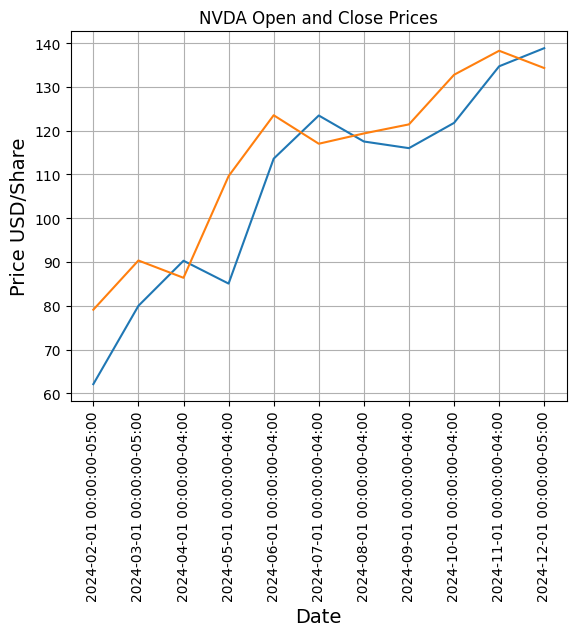

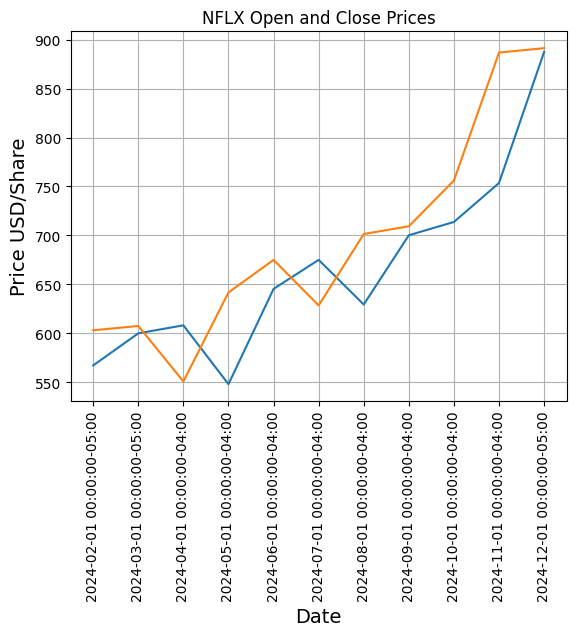

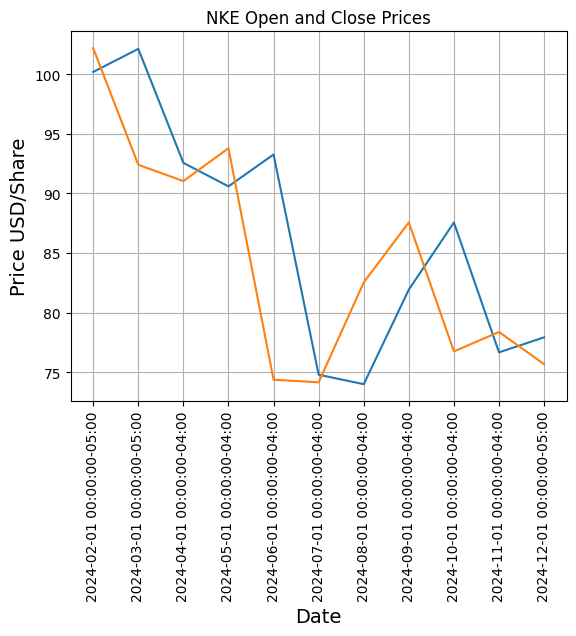

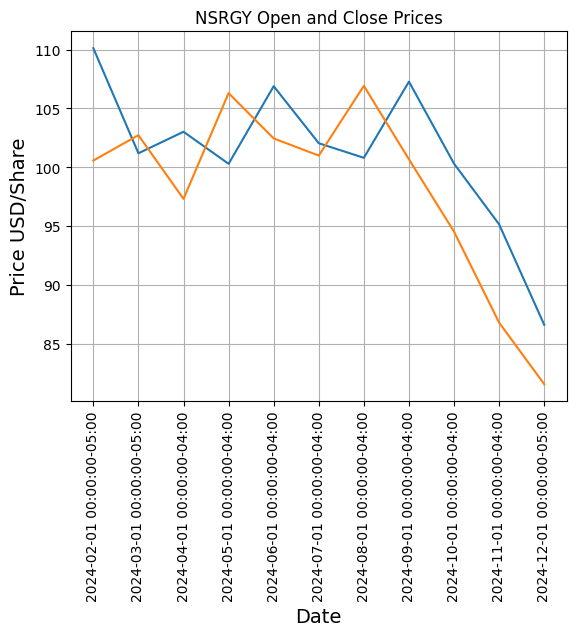

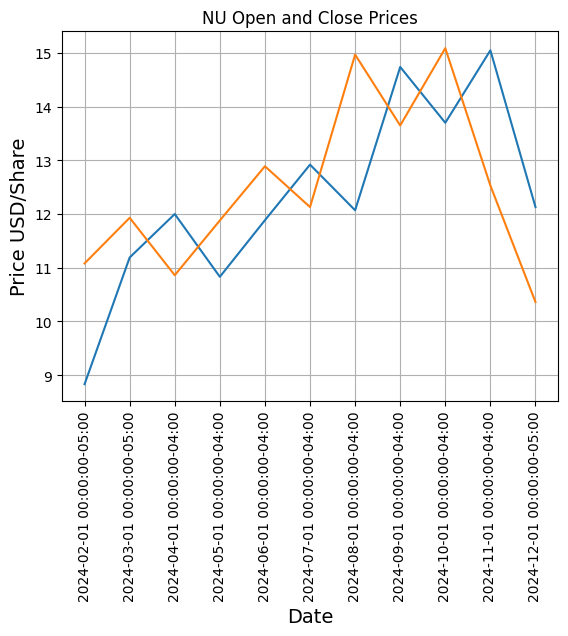

In [3]:
tickers = ("NVDA, NFLX, NKE, NSRGY,NU ").split(',')
stocks = [ticker.strip() for ticker in tickers]
# Reference : https://mayerkrebs.com/yfinance-library-the-definitive-guide/

for a in stocks:
  stock = yf.Ticker(a)
  # print(stock) -- stock is yfinance.Ticker object
  # the following data is monthly for last year , similarly you can calculate for daily, monthly and yearly for required time interval.
  start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')
  ticker_hist = stock.history(period='max',start = start_date, end= datetime.now().strftime('%Y-%m-%d') ,interval='1mo')
  ticker_hist.to_csv(f"{a}_hist.csv")
  data = pd.read_csv(f"{a}_hist.csv")
  plt.plot(data['Date'], data['Open'])
  plt.plot(data['Date'], data['Close'])
  # I could not include legend but blue in closing price and orange is opening price.
  plt.title(f'{a} Open and Close Prices')
  plt.grid(True)
  plt.xlabel('Date',fontsize=14)
  plt.ylabel('Price USD/Share',fontsize=14)
  plt.xticks(rotation=90)
  plt.show()

  # print(ticker_hist)
  print("\n\n")


In [4]:
for a in stocks:
  stock = yf.Ticker(a)
  ticker_hist2 = stock.history(period='max', end= datetime.now().strftime('%Y-%m-%d'), interval = "1d")
  ticker_hist2.to_csv(f"{a}_hist2.csv")
  data2 = pd.read_csv(f"{a}_hist2.csv")
  ticker_hist3 = stock.history(period='max', start =(datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d') , end= datetime.now().strftime('%Y-%m-%d'), interval = "1d")
  ticker_hist3.to_csv(f"{a}_hist3.csv")
  data3 = pd.read_csv(f"{a}_hist3.csv")
  print(f'{a} Lifetime High and Low Prices')
  print(f"Lifetime Low - {data2['Close'].min()}")
  print(f"Lifetime High - {data2['Close'].max()}")
  print(f'{a} 52-week High and Low Prices')
  print(f"52-week Low - {data3['Close'].min()}")
  print(f"52-week High - {data3['Close'].max()}")
  print("\n")

NVDA Lifetime High and Low Prices
Lifetime Low - 0.0312863513827323
Lifetime High - 148.8697509765625
NVDA 52-week High and Low Prices
52-week Low - 47.55551528930664
52-week High - 148.8697509765625


NFLX Lifetime High and Low Prices
Lifetime Low - 0.372857004404068
Lifetime High - 936.5599975585938
NFLX 52-week High and Low Prices
52-week Low - 468.5
52-week High - 936.5599975585938


NKE Lifetime High and Low Prices
Lifetime Low - 0.0756097584962844
Lifetime High - 170.15216064453125
NKE 52-week High and Low Prices
52-week Low - 70.41490936279297
52-week High - 105.3724594116211


NSRGY Lifetime High and Low Prices
Lifetime Low - 5.57309627532959
Lifetime High - 130.0750274658203
NSRGY 52-week High and Low Prices
52-week Low - 81.4800033569336
52-week High - 112.92933654785156


NU Lifetime High and Low Prices
Lifetime Low - 3.309999942779541
Lifetime High - 15.890000343322754
NU 52-week High and Low Prices
52-week Low - 8.09000015258789
52-week High - 15.890000343322754




In [5]:
# Standard Deviation (as a measure of risk)
# Return Measures: Daily, monthly, and annual returns using percentage changes.
# Beta Calculation: beta over 5 years. beta > 1 risky

for a in stocks:
  stock = yf.Ticker(a)
  ticker_hist4 = stock.history(period='max', end= datetime.now().strftime('%Y-%m-%d'))
  ticker_hist4.to_csv(f"{a}_hist4.csv")
  data4 = pd.read_csv(f"{a}_hist4.csv")

# Display risk measures
  print(f'{a} Risk Measures')
  print(f"Daily Standard Deviation (Risk): {data4['Close'].pct_change().std()}")  # Calculate Daily Returns
  print(f"Monthly Standard Deviation (Risk): {data4['Close'].iloc[::30].pct_change().std()}")  # Calculate Monthly Returns
  print(f"Annual Standard Deviation (Risk): {data4['Close'].iloc[::365].pct_change().std()}")  # Calculate Annual Returns
  print(f"{a} Beta : {stock.info.get('beta')}")
  print("\n")


NVDA Risk Measures
Daily Standard Deviation (Risk): 0.03777860866534379
Monthly Standard Deviation (Risk): 0.20684517331358562
Annual Standard Deviation (Risk): 1.5337589443286066
NVDA Beta : 1.657


NFLX Risk Measures
Daily Standard Deviation (Risk): 0.03493267324977655
Monthly Standard Deviation (Risk): 0.20069559558104993
Annual Standard Deviation (Risk): 1.3732926527635485
NFLX Beta : 1.25


NKE Risk Measures
Daily Standard Deviation (Risk): 0.021517609116500733
Monthly Standard Deviation (Risk): 0.11514623780126387
Annual Standard Deviation (Risk): 0.4835474847457798
NKE Beta : 1.035


NSRGY Risk Measures
Daily Standard Deviation (Risk): 0.01312648325647573
Monthly Standard Deviation (Risk): 0.05901717127464316
Annual Standard Deviation (Risk): 0.1673586835989979
NSRGY Beta : 0.349


NU Risk Measures
Daily Standard Deviation (Risk): 0.040397415936118126
Monthly Standard Deviation (Risk): 0.19594835973039607
Annual Standard Deviation (Risk): 1.0570823064207877
NU Beta : None




NVDA Moving Averages 20-day : 137.14751586914062
NVDA Moving Averages 50-day : 139.88414703369142
NVDA RSI 14-day : -0.0023991598854628793
NVDA MACD 12-day : 136.52445874390085
NVDA MACD 26-day : 137.28592948793434
NVDA MACD 9-day signal : -0.7614707440334882


NVDA Rolling Std 30D : 0.3586770770510641
NVDA Rolling Std 60D : 0.36720474579796036


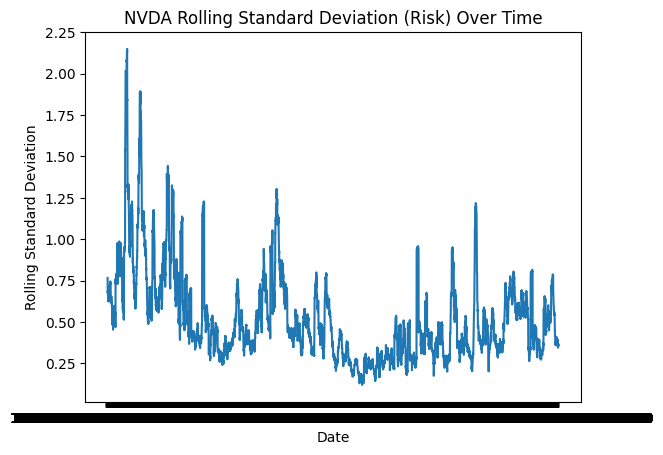

NFLX Moving Averages 20-day : 914.0859954833984
NFLX Moving Averages 50-day : 853.1277954101563
NFLX RSI 14-day : -0.0026102014354172204
NFLX MACD 12-day : 908.0240015003778
NFLX MACD 26-day : 894.716243490546
NFLX MACD 9-day signal : 13.307758009831787


NFLX Rolling Std 30D : 0.2589453616020768
NFLX Rolling Std 60D : 0.32453799420671886


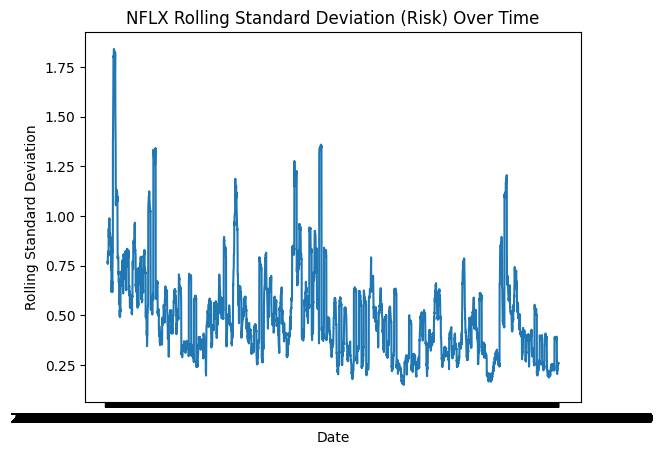

NKE Moving Averages 20-day : 77.32550010681152
NKE Moving Averages 50-day : 77.14101364135742
NKE RSI 14-day : -0.0018851117407791941
NKE MACD 12-day : 76.54884009189944
NKE MACD 26-day : 77.01998769558061
NKE MACD 9-day signal : -0.4711476036811746


NKE Rolling Std 30D : 0.22816407818403112
NKE Rolling Std 60D : 0.2145591472068293


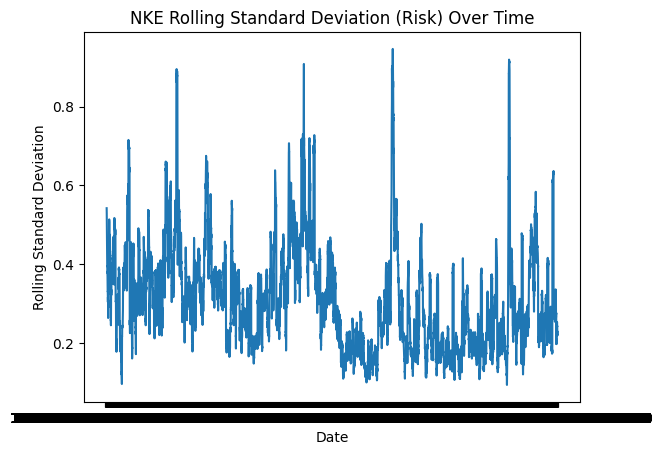

NSRGY Moving Averages 20-day : 83.57550048828125
NSRGY Moving Averages 50-day : 88.10760055541992
NSRGY RSI 14-day : -0.0022444852550011266
NSRGY MACD 12-day : 82.72817031120341
NSRGY MACD 26-day : 84.42675254239437
NSRGY MACD 9-day signal : -1.6985822311909544


NSRGY Rolling Std 30D : 0.14693061283400755
NSRGY Rolling Std 60D : 0.14151965507016126


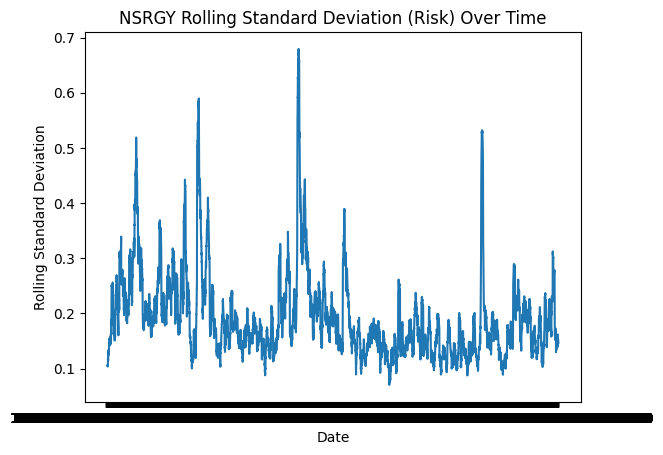

NU Moving Averages 20-day : 11.219999885559082
NU Moving Averages 50-day : 13.191999893188477
NU RSI 14-day : -0.006915896661290463
NU MACD 12-day : 10.786771311656178
NU MACD 26-day : 11.60079087365049
NU MACD 9-day signal : -0.8140195619943125


NU Rolling Std 30D : 0.491940587052033
NU Rolling Std 60D : 0.47811138423796806


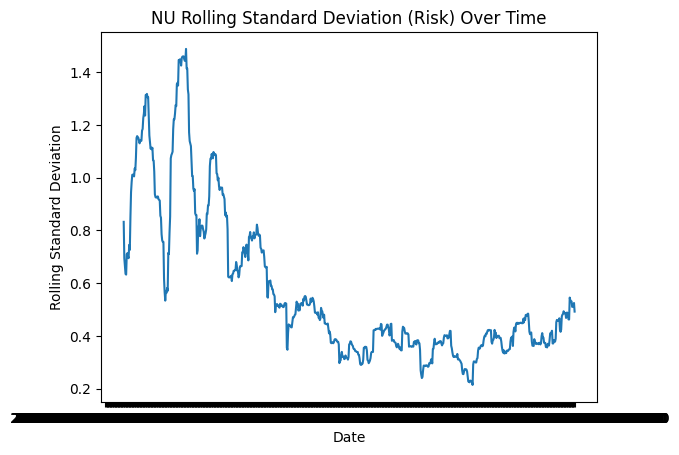

In [6]:
# Technical indicators:
# Simple Moving Average (20-day and 50-day)
# RSI (14-day)
# MACD (12-day, 26-day, 9-day signal)

#def my_fun(x): return x.iloc[-1] - x.iloc[0]
# x['x_1'].rolling(window=2).apply(my_fun)
# you can compute the differences between values at 2 steps.

for a in stocks:
  stock = yf.Ticker(a)
  ticker_hist4 = stock.history(period='max', end= datetime.now().strftime('%Y-%m-%d'))
  ticker_hist4.to_csv(f"{a}_hist4.csv")
  data4 = pd.read_csv(f"{a}_hist4.csv")
  print(f"{a} Moving Averages 20-day : {data4['Close'].rolling(window=20).mean().iloc[-1]}")
  print(f"{a} Moving Averages 50-day : {data4['Close'].rolling(window=50).mean().iloc[-1]}")

  print(f"{a} RSI 14-day : {data4['Close'].pct_change().ewm(span=14).mean().iloc[-1]}")

  # MACD = 12-period EMA - 26-period EMA
  # ewm is exponentially weighted function
  print(f"{a} MACD 12-day : {data4['Close'].ewm(span=12).mean().iloc[-1]}")
  print(f"{a} MACD 26-day : {data4['Close'].ewm(span=26).mean().iloc[-1]}")
  data4['MACD'] = data4['Close'].ewm(span=12).mean().iloc[-1] - data4['Close'].ewm(span=26).mean().iloc[-1]
  print(f"{a} MACD 9-day signal : {data4['MACD'].ewm(span=9).mean().iloc[-1]}")
  print("\n")

# Analyze the changing nature of risk parameters over time.
  # Daily return = data4['Close'].pct_change()
  # 252 are trading days hence multiplied by sqrt(252
# Calculate Rolling Standard Deviation (Risk) over 30-day and 60-day windows
  print(f"{a} Rolling Std 30D : {data4['Close'].pct_change().rolling(window=30).std().iloc[-1] * 15.8745}") # Annualized
  print(f"{a} Rolling Std 60D : {data4['Close'].pct_change().rolling(window=60).std().iloc[-1] * 15.8745}") # Annualized
  plt.title(f'{a} Rolling Standard Deviation (Risk) Over Time')
  plt.plot(data4['Date'], data4['Close'].pct_change().rolling(window=30).std() * 15.8745)
  # I don't know how to set the pace of dates in y axis.
  plt.xlabel('Date')
  plt.ylabel('Rolling Standard Deviation')
  plt.show()

# Peaks indicate periods of high volatility, while troughs indicate lower volatility.

In [7]:
# Now, we continue with the next subpart -- > I. Market Analysis b. Ratio Analysis
# Implement functions to calculate and analyze key financial ratios for the most recent fiscal year:
# latest year is given by index[0] bcz it starts with 31 jan of each year and data is for all time
for a in stocks:
  stock = yf.Ticker(a)
  print(f"{a}")
# Valuation ratios (P/E, P/B, EV/EBITDA)
  print(f"{a} P/E Ratio : {stock.info['trailingPE']}")
  print(f"{a} P/B Ratio : {stock.info['priceToBook']}")
  try:
    print(f"{a} EV/EBITDA : {stock.info['enterpriseToEbitda']}")
  except:
    print(f"{a} EV/EBITDA : N/A")

# Growth parameters (Revenue growth, EPS growth)
  print(f"{a} Revenue Growth : {stock.info['revenueGrowth']}")
  print(f"{a} EPS Growth : {stock.info['earningsQuarterlyGrowth']}")
  print("\n")

  available_dates = stock.financials.columns
  print(available_dates[0])
  if len(available_dates)>0:
      financials = stock.financials.loc[:, available_dates[0]]
      #  print(financials)
      balancesheet = stock.get_balance_sheet().loc[:, available_dates[0]]
      #  print(balancesheet)
      cashflow = stock.get_cashflow().loc[:, available_dates[0]]
      #  print(cashflow)

# Profitability ratios (ROE, ROA, Profit Margin)
      try:
        print(f"{a} ROE Ratio : {financials['Net Income'] / (balancesheet['CashCashEquivalentsAndShortTermInvestments'] - balancesheet['TotalDebt'])}") # ROE = Net Income / (Total Assets - Total Liabilities)
      except:
        print(f"{a} ROE Ratio : N/A")
      try:
        print(f"{a} ROA Ratio : {financials['Net Income'] / balancesheet['CashCashEquivalentsAndShortTermInvestments']}") # ROA = Net Income / Total Assets
      except:
        print(f"{a} ROA Ratio : N/A")
      print(f"{a} Profit Margin : {financials['Net Income'] / financials['Total Revenue']}")

# Cash flow parameters (FCF, Cash Conversion Cycle)
      print(f"{a} FCF : {cashflow['OperatingCashFlow'] - cashflow['CapitalExpenditure'] }")
      try:
        print(f"{a} Cash Conversion Cycle : {(balancesheet['Inventory'] /financials['Cost Of Revenue']) * 365}")
      except:
        print(f"{a} Cash Conversion Cycle : N/A")

# Working capital management (Current Ratio, Quick Ratio)
      try:
        print(f"{a} Current Ratio : {balancesheet['CashCashEquivalentsAndShortTermInvestments'] / cashflow['ChangeInPayablesAndAccruedExpense'] }")
      except:
        print(f"{a} Current Ratio : N/A")
      try:
        print(f"{a} Quick Ratio : {(balancesheet['CashCashEquivalentsAndShortTermInvestments'] - balancesheet[ 'Inventory']) / balancesheet['TotalDebt']}")
      except:
        print(f"{a} Quick Ratio : N/A")
      print("\n")

NVDA
NVDA P/E Ratio : 52.870075
NVDA P/B Ratio : 77.001144
NVDA EV/EBITDA : 58.085
NVDA Revenue Growth : 1.224
NVDA EPS Growth : 1.682


2024-01-31 00:00:00
NVDA ROE Ratio : 1.9935691318327975
NVDA ROA Ratio : 1.145320197044335
NVDA Profit Margin : 0.4884934834706674
NVDA FCF : 29159000000.0
NVDA Cash Conversion Cycle : 115.99362252572048
NVDA Current Ratio : 7.307086614173229
NVDA Quick Ratio : 1.872467438494935


NFLX
NFLX P/E Ratio : 50.499718
NFLX P/B Ratio : 16.76895
NFLX EV/EBITDA : 39.119
NFLX Revenue Growth : 0.15
NFLX EPS Growth : 0.409


2023-12-31 00:00:00
NFLX ROE Ratio : -0.7302790203061965
NFLX ROA Ratio : 0.7576458912344636
NFLX Profit Margin : 0.16036362043723068
NFLX FCF : 7622853000.0
NFLX Cash Conversion Cycle : N/A
NFLX Current Ratio : 36.220605174889755
NFLX Quick Ratio : N/A


NKE
NKE P/E Ratio : 23.354939
NKE P/B Ratio : 7.8814707
NKE EV/EBITDA : 16.192
NKE Revenue Growth : -0.104
NKE EPS Growth : -0.275


2024-05-31 00:00:00
NKE ROE Ratio : -15.405405405405405
N

Compare the stock price performance with the firm's financial performance.

- Lower current ratio implies greater reliance on operating cash flows or short-term financing.
- Cash ratio is reliable during stable market condition.
- A higher EPS indicates greater value of stock.
- If the stock price consistently rises with revenue growth, it indicates the market is pricing the company’s growth accurately.
- The higher the ROE, the better the company is at generating profits using shareholder equity.A good ROE to be one that increases steadily over time.

- If EPS growth leads stock price increases, it suggests earnings are a key driver of market value.
- Beta value of stock tells if stock is risky or not.
- If the stock price and ROE move in the same direction, it implies that the market values the company’s efficiency in generating returns.
- If the stock price falls while financial metrics like EPS and revenue growth rise, it might indicate that external factors, market sentiment, or future growth expectations are affecting the stock.

In [8]:
# five companies stocks' with starting letter "n" chosen are: NVDA,NFLX,NKE,NSRGY,NU
# Primary company - NVIDIA
# 5 companies - NVIDIA (NVDA), Netflix (NFLX), Nike (NKE), Nestlé (NSRGY), Nubank (NU)

# Proceeding further with the second part -- >  II. Portfolio Analysis    a. Portfolio Construction and Evaluation

# Implement a function to construct a portfolio of 5 stocks:
import numpy as np
from sklearn.linear_model import LinearRegression

primary_stock = 'NVDA'
weights = [0.30, 0.175, 0.175, 0.175, 0.175]  # 30% in primary stock, remaining price-weighted
# yf.download to download price history
multi_data = yf.download(['NVDA', 'NFLX', 'NKE', 'NSRGY', 'NU'], start="2021-08-25", end="2024-08-25", interval = "1mo")['Close'] # the last 3 years
# print(multi_data)

# Develop functions to calculate portfolio metrics using daily data for the last 3 years:
# Calculate the portfolio returns based on the given weights
returns = multi_data.pct_change() # Daily returns
portfolio_returns = (returns * weights).sum()
print(f"Portfolio Returns:{portfolio_returns}")
print("\n")

risk_free_rate = 0.03 / 252  # Daily risk-free rate assuming 3.0% annual rate (U.S. Normalized Risk-Free Rate)
# The S&P 500 index, or Standard & Poor's 500 is leading indicator for the performance
benchmark = yf.download('^GSPC', start="2021-08-25", end="2024-08-25")['Close'].pct_change().mean() # Benchmark index (e.g., S&P 500)
market_beta = yf.Ticker('NVDA').info['beta']

# Sharpe ratio, Treynor ratio, Jensen's Alpha
sharpe_ratio =(portfolio_returns - risk_free_rate).mean() / np.std(portfolio_returns - risk_free_rate)
print(f"Sharpe Ratio: {sharpe_ratio}")
treynor_ratio = (portfolio_returns - risk_free_rate).mean() / market_beta
print(f"Treynor Ratio: {treynor_ratio}")
jensen_alpha = (portfolio_returns - ((risk_free_rate + market_beta)*(returns -risk_free_rate))).mean()
print(f"Jensen's Alpha: {jensen_alpha}")


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


Portfolio Returns:Ticker
NFLX     0.173237
NKE     -0.067340
NSRGY   -0.011232
NU       0.180406
NVDA     0.402132
dtype: float64


Sharpe Ratio: 0.8168883382287285
Treynor Ratio: 0.08166655029422325
Jensen's Alpha: Ticker
NFLX     0.146094
NKE     -0.048924
NSRGY   -0.007996
NU       0.125496
NVDA     0.293532
dtype: float64


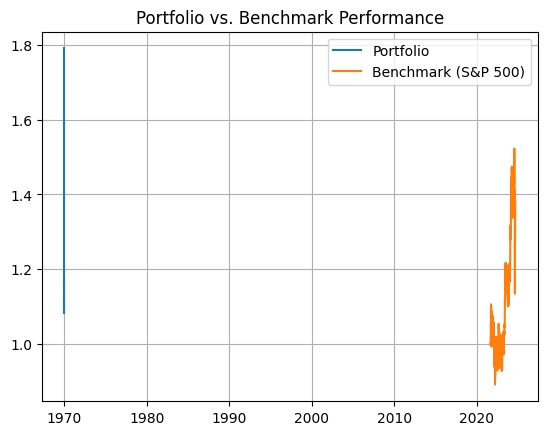

[*********************100%***********************]  1 of 1 completed

            Portfolio  Benchmark
Date                            
2021-12-31   0.790703   0.038482
2022-12-31   0.790703  -0.093680
2023-12-31   0.790703   0.282422
2024-12-31   0.790703   0.146428


In [12]:
# Cumulative returns of the portfolio and benchmark
plt.grid(True)
plt.plot((1 + portfolio_returns).cumprod(), label='Portfolio')  # cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()
# portfolio return is in percentage so cumprod helps to apply portfolioreturn to new return on stock, same with benchmark.
plt.plot((1 + benchmark).cumprod(), label='Benchmark (S&P 500)') # cumulative_benchmark_returns = (1 + benchmark).cumprod()
plt.title('Portfolio vs. Benchmark Performance')
plt.legend()
plt.show()

# Annual performance comparison
portfolio_returns = portfolio_returns.reset_index(drop=True)
portfolio_returns.index = pd.to_datetime(portfolio_returns.index) # Convert the index to DatetimeIndex
# print(f'Portfolio returns : {portfolio_returns}')
benchmark = yf.download('^N225', start="2021-08-25", end="2024-08-25")['Close'].pct_change() # Mind here no mean..
benchmark.index = pd.to_datetime(benchmark.index)
# print(f'Benchmark returns : {benchmark}')

performance_comparison = pd.DataFrame({
    'Portfolio': portfolio_returns.resample('YE').apply(lambda x: (1 + x).prod() - 1).squeeze(), # thi i annual, squeeze to make it 1D
    'Benchmark': benchmark.resample('YE').apply(lambda x: (1 + x).prod() - 1).squeeze() # squeeze to make it 1D
})
print(performance_comparison)

final_message = '''
Hello,
This submission includes an explanation. I have done my best to ensure the code functions correctly and produces the expected output.
Data has been cleaned up for better analysis of the information.
'''
